In [ ]:
# This is an example GPT style decoder only transformer model and example dataset
# This an example of the use of the icanswim/cosmosis repo for data science and 
# machine learning projects

In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../')

from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau

from cosmosis.dataset import AsTensor
from cosmosis.learning import Learn, Selector, Metrics
from cosmosis.model import GPT

from dataset import TinyShakes

In [ ]:
# explore the ds

ds_param = {'transforms': {'tokens': [AsTensor()],
                           'y': [AsTensor()],
                           'position': [AsTensor()]},
            'd_seq': 10,
            'n': 1}

ts = TinyShakes(**ds_param)

print(ts[0])
print(ts[0]['tokens'].shape, ts[0]['tokens'].dtype)
print(ts[0]['y'].shape, ts[0]['y'].dtype)
print('decoded tokens: ', ts.encoding.decode(ts[0]['tokens'].tolist()))
print('decoded y: ', ts.encoding.decode(ts[0]['y'].tolist()))

In [10]:
# example using prompt for inference

ds_param = {'transforms': {'tokens': [AsTensor()],
                           'y': [AsTensor()],
                           'position': [AsTensor()]},
            'd_seq': 10,
            'prompt': 'All the worlds a stage and all the men and women merely'}

prompt = TinyShakes(**ds_param)
print(prompt[0])
print(prompt[0]['tokens'].shape)
print(prompt[0]['y'].shape)
print('decoded tokens: ', prompt.encoding.decode(prompt[0]['tokens'].tolist()))
print('decoded y: ', prompt.encoding.decode(prompt[0]['y'].tolist()))

len(self.ds_idx):  55
data.nbytes:  24
CDataset created...
{'tokens': tensor([ 3237,   262, 11621,   257,  3800,   290,   477,   262,  1450,   290]), 'y': tensor([  262, 11621,   257,  3800,   290,   477,   262,  1450,   290,  1466]), 'position': tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}
torch.Size([10])
torch.Size([10])
decoded tokens:  All the worlds a stage and all the men and
decoded y:   the worlds a stage and all the men and women


In [9]:
# pass a single example from dataset to model to loss function
# (batch, d_seq, d_model)

d_seq = 3 # dimension sequence
d_vocab = 50304 # dimension vocabulary
d_vec = 4 # dimension embedding vector
d_model = 4 # dimension model input
assert d_model == d_vec

ds_param = {'transforms': {'tokens': [AsTensor()],
                           'y': [AsTensor()],
                           'position': [AsTensor()]},
            'd_seq': d_seq,
            'prompt': 'All the worlds a stage and all the men and women merely'}

prompt = TinyShakes(**ds_param)
print('prompt[0]: ', prompt[0])
print('prompt[0][tokens].shape: ', prompt[0]['tokens'].shape, prompt[0]['tokens'].dtype)
print('prompt[0][y].shape: ', prompt[0]['y'].shape)
print('prompt[0][position].shape: ', prompt[0]['position'].shape)
print('decoded tokens: ', prompt.encoding.decode(prompt[0]['tokens'].tolist()))
print('decoded y tokens: ', prompt.encoding.decode(prompt[0]['y'].tolist()))

model_param = {'device': 'cpu',
               'd_model': d_model, # matches embedding dimension
               'd_vocab': d_vocab, 
               'n_head': 2, 
               'num_layers': 2,
               'd_seq': d_seq,
               'd_vec': d_vec,
               'embed_param': {'tokens': (d_vocab, d_vec, None, True), 
                               'y': (d_vocab, d_vec, None, True),
                               'position': (d_seq, d_vec, None, True)}} 

gpt = GPT(model_param)

data = prompt[0]
out = gpt(data)
print('output: ', out, out.shape, out.dtype)

prompt_tokens = data['tokens']
print('prompt_tokens: ', prompt_tokens, prompt_tokens.shape, prompt_tokens.dtype)

target_tokens = data['y']
print('target_tokens: ', target_tokens, target_tokens.shape, target_tokens.dtype)

generated_embeddings = out.squeeze()
print('generated_embeddings: ', generated_embeddings, generated_embeddings.shape, generated_embeddings.dtype)
print('decoded generated tokens: ', prompt.encoding.decode(generated_embeddings.argmax(dim=-1).tolist()))

cel_func = CrossEntropyLoss()
loss = cel_func(out, target_tokens)
print('loss: ', loss)


len(self.ds_idx):  55
data.nbytes:  24
CDataset created...
prompt[0]:  {'tokens': tensor([ 3237,   262, 11621]), 'y': tensor([  262, 11621,   257]), 'position': tensor([0, 1, 2])}
prompt[0][tokens].shape:  torch.Size([3]) torch.int64
prompt[0][y].shape:  torch.Size([3])
prompt[0][position].shape:  torch.Size([3])
decoded tokens:  All the worlds
decoded y tokens:   the worlds a
applying _init_weights...
GPT model loaded...
data:  {'tokens': tensor([ 3237,   262, 11621]), 'y': tensor([  262, 11621,   257]), 'position': tensor([0, 1, 2])}
output:  tensor([[-0.0109, -0.0323,  0.0431,  ...,  0.0918, -0.0462, -0.0294],
        [-0.0147,  0.0170,  0.0243,  ...,  0.0311, -0.0589,  0.0334],
        [-0.0266, -0.0246,  0.0248,  ...,  0.1053, -0.0078, -0.0460]],
       grad_fn=<MmBackward0>) torch.Size([3, 50304]) torch.float32
prompt_tokens:  tensor([ 3237,   262, 11621]) torch.Size([3]) torch.int64
target_tokens:  tensor([  262, 11621,   257]) torch.Size([3]) torch.int64
generated_embeddings:  

tinyshakes.txt loaded from saved file in ../gpt/data/
tokens loaded from file ./data/tinyskakes_encoded.bin
len(self.ds_idx):  1000
data.nbytes:  676050
CDataset created...
applying _init_weights...
GPT model loaded...
running model on gpu...

.....................

total elapsed time: 0:00:01.457376
epoch: 1
y_pred:   tillder lethPeace firerend near shortous prison
y:  As prisoners to her womanly persuasion.
K
train loss: 0.38786254372707635, val loss: 0.4862866699695587
lr: 0.01

.....................

total elapsed time: 0:00:02.595886
epoch: 5
y_pred:   F discZ French odd Mantuckquinhearted Stanley
y:  
Romeo, the hate I bear thee
train loss: 0.33462187578511793, val loss: 0.5170546770095825
lr: 0.005
early stopping!  learning rate is below the set minimum...

........final........

total learning time: 0:00:03.447656
test loss: 0.5499324003855387


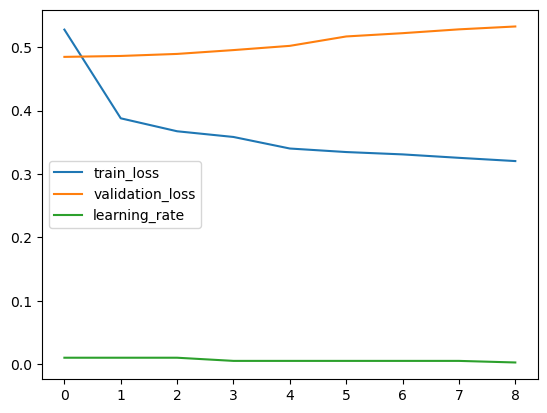

In [2]:
# put all together in a learner
# (batch, d_seq, d_model)

d_seq = 10 # dimension sequence
d_vocab = 50304 # dimension vocabulary
d_vec = 128 # dimension embedding vector
d_model = 128 # dimension model input
assert d_model == d_vec

ds_param = {'train_param': {'transforms': {'tokens': [AsTensor()],
                            'y': [AsTensor()],
                            'position': [AsTensor()]},
            'd_seq': d_seq,
            'n': 1000,
                           }}

model_param = {'d_model': d_model,
               'd_vocab': d_vocab, 
               'n_head': 8, 
               'num_layers': 6,
               'd_seq': d_seq,
               'd_vec': d_vec,
               'embed_param': {'tokens': (d_vocab, d_vec, None, True), 
                               'y': (d_vocab, d_vec, None, True),
                               'position': (d_seq, d_vec, None, True)}} 
                                       
metrics_param = {'metric_name': 'transformer',
                 'report_interval': 1,
                 'log_plot': False,
                 'min_lr': .0025} # break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                'splits': (.7,.15)}

sched_param = {'factor': .5, 
               'patience': 2,
               'cooldown': 2}

learn = Learn([TinyShakes], 
              GPT,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=CrossEntropyLoss,
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=16, epochs=10, gpu=True, 
              save_model=False, load_model=None,
              target='y')

In [2]:
# inference
d_seq = 10 # dimension sequence
d_vocab = 50304 # dimension vocabulary
d_vec = 512 # dimension embedding vector
d_model = 512 # dimension model input
assert d_model == d_vec

ds_param = {'train_param': {'transforms': {'tokens': [AsTensor()],
                            'y': [AsTensor()],
                            'position': [AsTensor()]},
            'd_seq': d_seq,
            'prompt': 'All the worlds a stage and all the men and woman merely'}}

model_param = {'d_model': d_model,
               'd_vocab': d_vocab, 
               'n_head': 8, 
               'num_layers': 6,
               'd_seq': d_seq,
               'd_vec': d_vec,
               'temperature': 1,
               'embed_param': {'tokens': (d_vocab, d_vec, None, True), 
                               #'y': (d_vocab, d_vec, None, True),
                               'position': (d_seq, d_vec, None, True)}} 
                                       
metrics_param = {'metric_name': 'transformer',
                 'report_interval': 1,
                 'log_plot': False,
                 'min_lr': .0025} # break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                'splits': (.7,.15)}

sched_param = {'factor': .5, 
               'patience': 2,
               'cooldown': 2}

learn = Learn([TinyShakes], 
              GPT,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=None, # no criterion implies inference
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=1, epochs=1, gpu=True, 
              load_model='gpt_test_model.pth', target='y')


len(self.ds_idx):  1
data.nbytes:  24
CDataset created...
applying _init_weights...
GPT model loaded...
model loaded from state_dict...
running model on gpu...

.....................

total learning time: 0:00:01.092596
predictions:  [[": world he word me\n the', the"]]
inference 2025-02-22 15:52:37.106383 complete and saved to csv...
